# Calculate total integrated KE along the beam

In [1]:
cd tasman-tides

/home/149/ab8992/tasman-tides


In [2]:
import argparse
import ttidelib as tt
import os
# os.chdir("tasman-tides")
import subprocess
import time
from dask.distributed import Client,default_client
from matplotlib import pyplot as plt
from pathlib import Path
home = Path("/home/149/ab8992/tasman-tides")
gdata = Path("/g/data/nm03/ab8992")
import matplotlib

def startdask():
    try:
    # Try to get the existing Dask client
        client = default_client()
        print(client)
    except ValueError:
        # If there's no existing client, create a new one
        client = Client()

startdask()

In [20]:
data = tt.collect_data("full-20",ppdata = ["dissipation","vorticity"],bathy = True)

# data["dissipation_topdown"] -= data["dissipation_topdown"].mean("time")
# data["dissipation_transect"] -= data["dissipation_transect"].mean("time")


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2007: UserWarning: The following kwargs were not used by contour: 'linestyle'
  primitive = ax.contour(x, y, z, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/xarray/plot/dataarray_plot.py:2007: UserWarning: The following kwargs were not used by contour: 'linestyle'
  primitive = ax.contour(x, y, z, **kwargs)


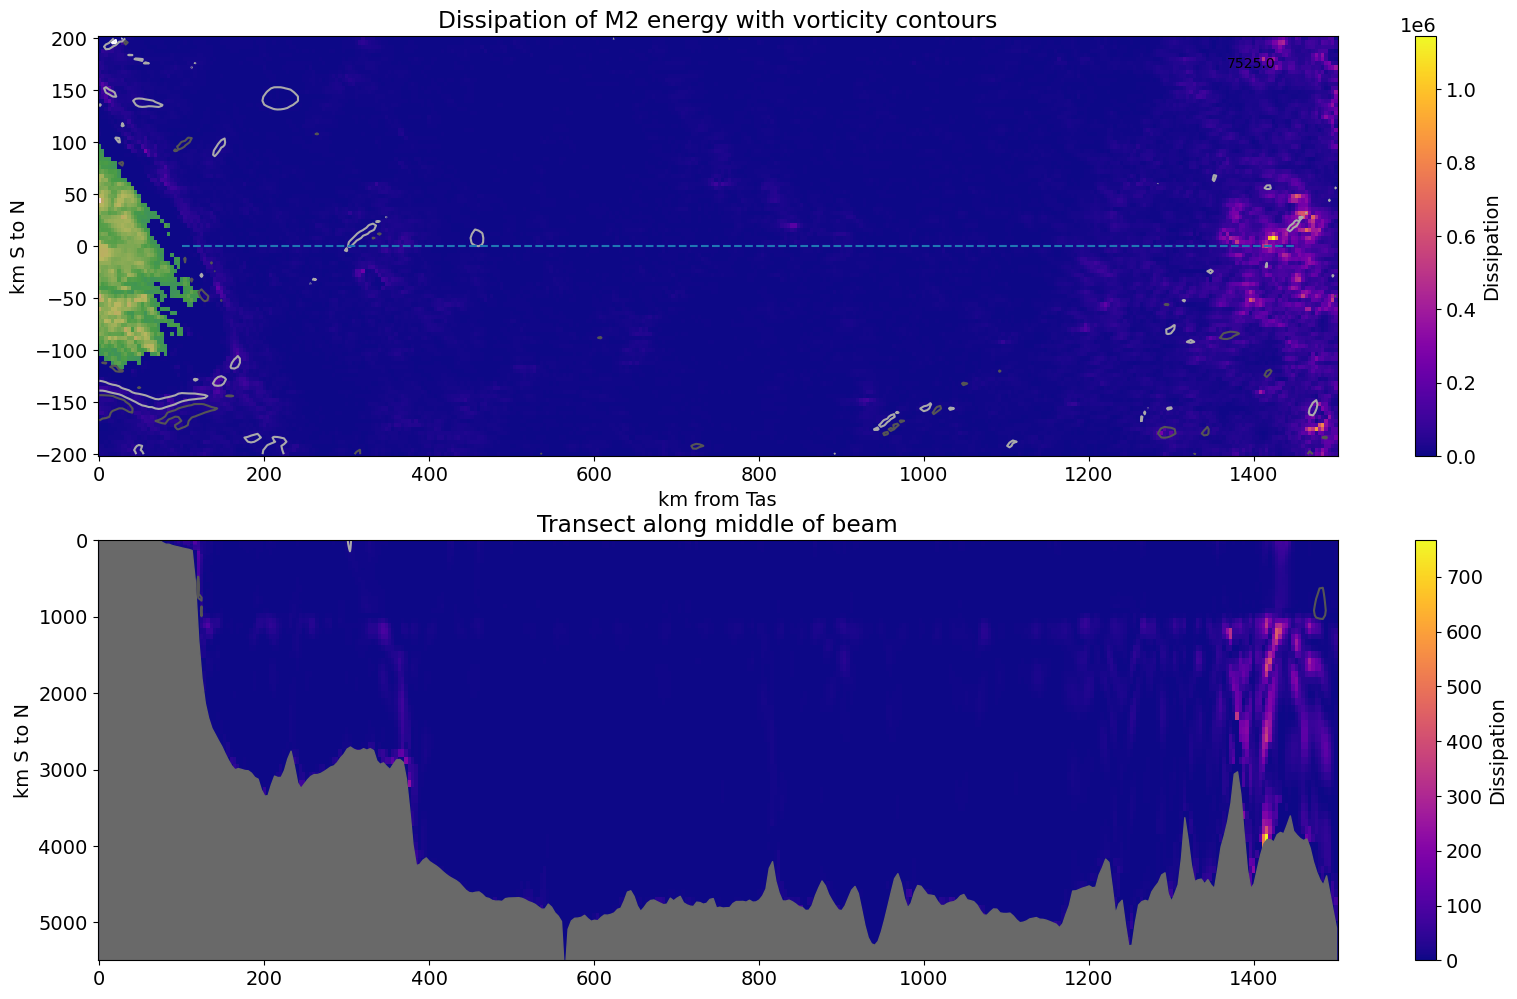

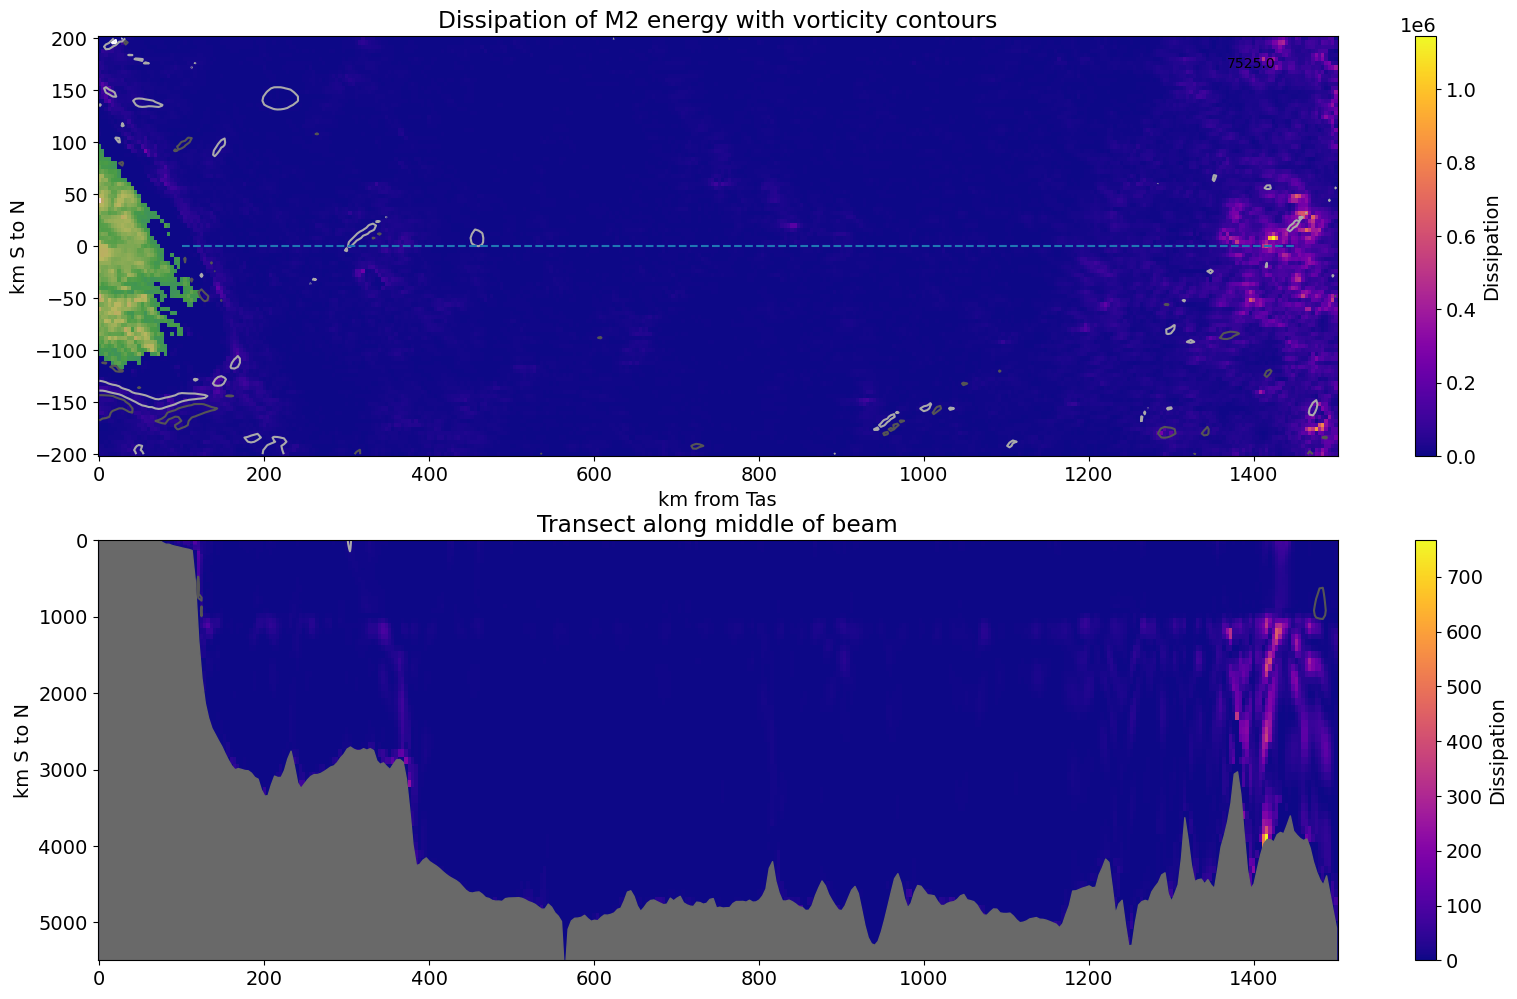

In [21]:
%matplotlib inline

# fig,ax = plt.subplots(1,figsize=(20, 12))

tt.plot_dissipation(data.isel(time = 50),vmax = None)

In [19]:
def some_function(a,b=5):
    return a+b

kwargs = {"b":10}

some_function(5,**kwargs)

15

In [35]:
data.isel(time = 20).vorticity_topdown.values

array([[-0.01420035, -0.00899919, -0.0029801 , ..., -0.00010521,
         0.00137128,  0.00176429],
       [ 0.00128752, -0.00294768, -0.00689161, ...,  0.00182143,
         0.00388285,  0.00582221],
       [-0.00484637, -0.00520407, -0.00090484, ...,  0.00525836,
         0.00774997,  0.00989079],
       ...,
       [ 0.01287543,  0.00809672,  0.02645128, ...,  0.00787612,
         0.01803344,  0.02140758],
       [ 0.        ,  0.        ,  0.        , ...,  0.00738981,
         0.01770902,  0.01816427],
       [ 0.        ,  0.        ,  0.        , ...,  0.00568287,
         0.01852349,  0.02082922]], dtype=float32)